In [32]:
from Traffic_Classifier_HSV import * 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.color import rgb2grey,rgb2hsv
from glob import glob
import os
import pandas as pd

from collections import defaultdict

In [33]:
x=defaultdict(list)

In [34]:
x["a"]
x["b"]

[]

In [36]:
x=pd.DataFrame(x)

In [37]:
x.to_csv("x.csv")

In [14]:
os.listdir("../")

['Plots and Graphs.html',
 'Traffic-Sign-Detection-and-3D-Localization-via-Deep-Convolutional.pdf',
 'gaussian_yolov3.ipynb',
 'run.py',
 'gaussian_yolov3.html',
 'inference.zip',
 'gaussian_yolov3_coco.pth',
 'Gaussian_yolo_hsv_classification',
 '.ipynb_checkpoints',
 'inference',
 'Final_Yolo.ipynb',
 'PyTorch_Gaussian_YOLOv3',
 'Gaussian Yolov3.pdf',
 'Inference.py',
 'my code ',
 'yolo',
 'Demo.pdf',
 'HD1080_SN4339_13-56-06.svo']

In [6]:
files = glob("Images/*")

In [7]:
files

['Images/Traffic.jpg']

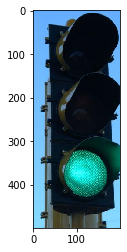

In [2]:
image_url = "Images/Traffic.jpg"

image = cv2.imread(image_url)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = image[50:-50,100:-100]
plt.imshow(image)

In [3]:
classify_color_cropped_image(image)

/home/mohamed/anaconda3/envs/deep_learning/lib/python3.7/site-packages/skimage/color/colorconv.py:268: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/mohamed/anaconda3/envs/deep_learning/lib/python3.7/site-packages/skimage/color/colorconv.py:272: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


(2, 'green')

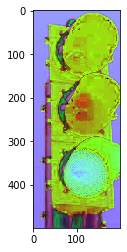

In [4]:
hsv_test_image=rgb2hsv(image)

plt.imshow(hsv_test_image)


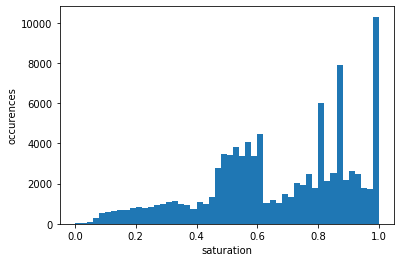

In [5]:

# isolating the saturation channel and visualizing the ditribution
# here we find that saturation is high at most of the area as the traffic light body is very good shaped 
s_val_1d=hsv_test_image[:,:,1].ravel()
plt.hist(s_val_1d,bins=50)
plt.xlabel("saturation")
plt.ylabel("occurences")
plt.savefig("saturation_distribution.png")
plt.show()

Text(0.5, 1.0, 'masked at 0.9 threshold')

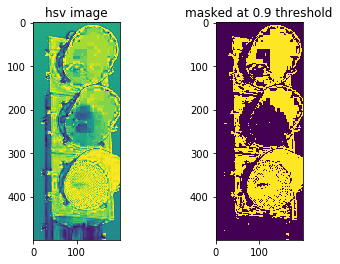

In [12]:
saturation_threshold=0.8
idx = hsv_test_image[:, :, 1] <=saturation_threshold
sat_mask = np.ones_like(hsv_test_image[:, :, 1])
sat_mask[idx] = 0
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].imshow(hsv_test_image[:,:,1])
ax[0].set_title("hsv image")
ax[1].imshow(sat_mask)
ax[1].set_title("masked at 0.9 threshold")



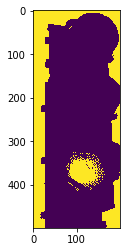

In [8]:
v_thres_val=0.7
val_mask=high_value_region_mask(hsv_test_image,v_thres=v_thres_val)
plt.imshow(val_mask)

### choosing the area with the high saturation and high hue values as the area to mask yielded a good results as expected


Text(0.5, 1.0, 'mask to be applied')

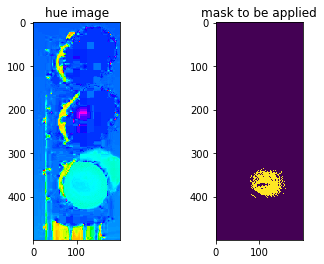

In [13]:
hue_image=hsv_test_image[:,:,0]
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].imshow(hue_image,cmap='hsv')
ax[0].set_title("hue image")
ax[1].imshow(np.logical_and(sat_mask,val_mask))
ax[1].set_title("mask to be applied")


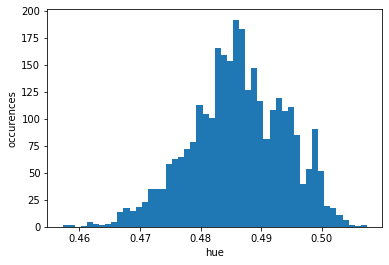

In [14]:
# plotting the hue image at the area of the light

hue_1d=hue_image[np.logical_and(val_mask, sat_mask)].ravel()

plt.hist(hue_1d,bins=50)
plt.xlabel("hue")
plt.ylabel("occurences")
plt.show()

In [20]:
# converting the hue values from [0,179] to [-pi,pi]
hue_angle = convert_to_hue_angle(hue_1d)
print("hue array in radian = ",hue_angle)

hue array in radian =  [0.01601824 0.01628974 0.01628193 ... 0.01628305 0.01631728 0.01631728]


In [22]:
# getting the range of every color in the picture 
color_values = get_rgy_color_mask(hue_angle)

print("values of the red in the hue array : ",color_values[0])
print("values of the green colors in the hue array : ",color_values[1])
print("values of the yellow colors in the hue array : ",color_values[2])

values of the red in the hue array :  [ True  True  True ...  True  True  True]
values of the green colors in the hue array :  [False False False ... False False False]
values of the yellow colors in the hue array :  [False False False ... False False False]


In [23]:
# then we calculate the ratio of the color to the image size 

ratio = [np.sum(color_values[0])/len(hue_angle),
        np.sum(color_values[1])/len(hue_angle),
        np.sum(color_values[2])/len(hue_angle)]
print("the ratio of the 3 colors in the image : ")
print ("       ",ratio)

the ratio of the 3 colors in the image : 
        [1.0, 0.0, 0.0]


#### it's obvious that's green is the highest ratio of them all 